# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d200/7037ec05b97576da1bd9db5e3ea6a322a577bc833b0dc772238248ef.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Toronto, Ontario, Canada**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(200,'7037ec05b97576da1bd9db5e3ea6a322a577bc833b0dc772238248ef')

<IPython.core.display.Javascript object>


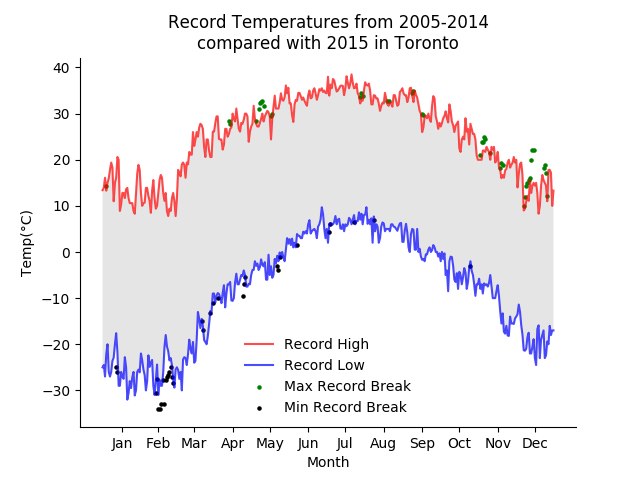

In [115]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Read CSV, change data to full degrees C, Make date format into datetime format    
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d200/7037ec05b97576da1bd9db5e3ea6a322a577bc833b0dc772238248ef.csv', skiprows=1, names=['ID','Date','Element','Temp(°C)'], header=None)
df['Temp(°C)'] *= 0.1 
df = df.sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])

#Retrieve month, year, day  from datetime and make into seperate columns
#Remove leap years, create seperate dataframe for 2005-2014 and 2015 data
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day
df['Year'] = df.Date.dt.year
df['Month-Day'] = df.Month.map(str) + '-' + df.Day.map(str)
df = df.drop(df[(df.Month == 2) & (df.Day == 29)].index)
df1 = df.drop(df[df.Year == 2015].index)
df2015 = df.loc[df['Year'] == 2015]
    
#2005-2014 Max and Min temp data
#Group by month, day then use .idxmax() to retrieve index of max value and use .loc to retrieve information from index
#Set the index by Month then Day. 
df_max = df1[df1['Element'] == 'TMAX']
df_max = df_max.loc[df_max.groupby(['Month','Day'])['Temp(°C)'].idxmax()]
df_max = df_max.set_index(['Month','Day'])

df_min = df1[df1['Element'] == 'TMIN']
df_min = df_min.loc[df_min.groupby(['Month','Day'])['Temp(°C)'].idxmin()]
df_min = df_min.set_index(['Month','Day'])

#2015 temp data above and below record temps
#Merge 10 year data with 2015 data by Month-Day combo
#Create array(retrieves index) where 2015 temps are either greater or less than 10 year max/min
#Retrieve data using the new array created as the index. 
df_max_2015 = df2015[df2015['Element'] == 'TMAX']
df_max_2015 = df_max_2015.loc[df_max_2015.groupby(['Month','Day'])['Temp(°C)'].idxmax()]
df_max_2015 = df_max_2015.set_index(['Month','Day'])
df_max_2015 = pd.merge(df_max_2015, df_max, left_on='Month-Day', right_on='Month-Day')
df_break = np.where(df_max_2015['Temp(°C)_x'] > df_max_2015['Temp(°C)_y'])
df_max_2015 = df_max_2015.iloc[df_break]

df_min_2015 = df2015[df2015['Element'] == 'TMIN']
df_min_2015 = df_min_2015.loc[df_min_2015.groupby(['Month','Day'])['Temp(°C)'].idxmin()]
df_min_2015 = df_min_2015.set_index(['Month','Day'])
df_min_2015 = pd.merge(df_min_2015, df_min, left_on='Month-Day', right_on='Month-Day')
df_break2 = np.where(df_min_2015['Temp(°C)_x'] < df_min_2015['Temp(°C)_y'])
df_min_2015 = df_min_2015.iloc[df_break2]


#Line plot of 10 year data
plt.figure()
plt.plot(df_max['Temp(°C)'].values, 'r', alpha = 0.7, label = 'Record High')
plt.plot(df_min['Temp(°C)'].values, 'b', alpha = 0.7, label = 'Record Low')

#scatter plot of 2015 data
plt.scatter(df_break, df_max_2015['Temp(°C)_x'].values, s=5, c='g', label = 'Max Record Break')   
plt.scatter(df_break2, df_min_2015['Temp(°C)_x'].values,s=5, c='k', label = 'Min Record Break')

#Axis labels, legend, removing top and right border of graph, title 
plt.xlabel('Month')
plt.ylabel('Temp(°C)')
plt.legend(frameon = False)
plt.title('Record Temperatures from 2005-2014\ncompared with 2015 in Toronto')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#creating list for month names, assigning month names to x axis
Month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Length = [16, 45, 74, 105, 135, 166, 196, 227, 258, 288, 319, 349]
plt.xticks(Length, Month_name)

#Filling in the area between max and min temps. 
plt.gca().fill_between(range(len(df_min['Temp(°C)'])), 
                       df_min['Temp(°C)'].values, df_max['Temp(°C)'].values, 
                       facecolor='grey', 
                       alpha=0.2)

